In [2]:
import numpy as np
import pandas as pd

import scipy.stats as stats

In [31]:
loan_data=pd.read_csv("C:\\Users\\d\\OneDrive\\Desktop\\Python Study Material\\Case studies\\Casr study 5\\LoansData.csv")

In [5]:
loan_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [32]:
loan_data.columns=loan_data.columns.str.replace('.','_')

C:\Users\d\AppData\Local\Temp\ipykernel_20072\3004714726.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan_data.columns=loan_data.columns.str.replace('.','_')


In [33]:
loan_data.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years


In [36]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   float64
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [54]:
loan_data.Interest_Rate=loan_data.Interest_Rate.replace("%","",regex = True).astype("float")
loan_data.Loan_Length=loan_data.Loan_Length.replace('months','').astype('object')
loan_data.Debt_To_Income_Ratio=loan_data.Debt_To_Income_Ratio.replace('%','',regex=True).astype('float')


In [55]:
loan_data.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years


In [60]:

def fn_describe( x ):
    
    n_tot = x.isnull().count()
    n_miss = x.isnull().sum()
    n_miss_perc = n_miss / n_tot
    
    p25 = x.quantile(0.25)
    p75 = x.quantile(0.75)
    
    iqr = p75 - p25
    
    lc_iqr = p25 - 1.5 * iqr
    uc_iqr = p75 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_tot, x.count(), n_miss, n_miss_perc, 
                       x.sum(), x.var(), x.std(), x.mean(), 
                       iqr, lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.50), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()],
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'n_miss', 'n_miss_perc',
                             'sum', 'var', 'std', 'mean',
                             'iqr', 'lc_iqr', 'uc_iqr',
                             'min', 'p1', 'p5', 'p10', 
                             'p25', 'p50', 'p75', 
                             'p90', 'p95', 'p99', 'max'])

In [58]:
loan_data_conti_vars = loan_data.loc[:, (loan_data.dtypes == 'float64') | (loan_data.dtypes == 'int64')]
loan_data_cat_vars = loan_data.loc[:, (loan_data.dtypes == 'object')]

In [63]:
loan_data_conti_vars.apply(fn_describe)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
dtype,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,380,710,275,1669,632,29,2349,10
n_tot,2500,2500,2500,2500,2500,2500,2500,2500
n,2499,2499,2498,2499,2499,2497,2497,2497
n_miss,1,1,2,1,1,3,3,3
n_miss_perc,0.0004,0.0004,0.0008,0.0004,0.0004,0.0012,0.0012,0.0012
sum,31001250.0,29993933.09,32637.34,38435.67,14216639.37,25152.0,38012292.0,2264.0
var,60885773.795507,60012404.344627,17.449011,56.325811,15706305.750123,20.316801,334195518.850116,1.515728
std,7802.933666,7746.767348,4.177201,7.505052,3963.118185,4.507416,18281.015258,1.231149
mean,12405.462185,12002.374186,13.065388,15.38042,5688.931321,10.072887,15223.184622,0.906688


In [69]:
for var in loan_data_conti_vars.columns:
        loan_data[var] = np.where(loan_data[var] > loan_data[var].quantile(0.99) ,
                                    loan_data[var].quantile(0.99), loan_data[var])

In [66]:
loan_data.drop( columns='Employment_Length' , inplace= True)
loan_data.dropna( inplace= True)

In [73]:
loan_data.isnull().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
dtype: int64

### Q1 (a)

Ho= loan amount and interest rate are not to each other/independent variables/Interest rates are same      
Ha= loan amount and interest rate are related to each other/dependent variables/Interest rates are different

At CI= 95% , p value = 0.05
Test= Spearsmen


In [78]:
stats.spearmanr(loan_data.Amount_Funded_By_Investors,loan_data.Interest_Rate)

SpearmanrResult(correlation=0.2825339098275235, pvalue=6.66251358551973e-47)

Business Conclusion -

since p value 6.66251358551973e-47 < 0.05 , we reject Ho
0.2825339098275235 indicates that there is a direct relationship in between loan amount given and interest rate 

### Q1 (b)

Ho= loan length and interest rates are not related/indpendent to each other 
Ha= loan length and interest rates are related/dpendent to each other 

At CI = 95% , p value = 0.05
Test = Pearson

In [75]:
stats.pearsonr(loan_data.Loan_Length,loan_data.Interest_Rate)

PearsonRResult(statistic=0.42321988664346377, pvalue=9.698700419277393e-109)

Business Conclusion -

since p value 9.698700419277393e-109 < 0.05 , we reject Ho
0.42321988664346377 indicates that there is a direct relationship in between time duration and interest rate 

### Q1 (c)

In [77]:
loan_data.Loan_Purpose.value_counts()

debt_consolidation    1301
credit_card            443
other                  199
home_improvement       152
major_purchase         101
small_business          86
car                     50
wedding                 38
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

Ho= Interest rates are same for all types of loans | mean of interest rates for all types of loans are same 
Ha= Interest rates are different for all types of loans | mean of interest rates for all types of loans are not same

At CI= 95%, P value = 0.05
Test = F test/ Annova 


In [81]:
P1 = loan_data.loc[ loan_data.Loan_Purpose == 'debt_consolidation', 'Interest_Rate' ]
P2 = loan_data.loc[ loan_data.Loan_Purpose == 'credit_card', 'Interest_Rate' ]
P3 = loan_data.loc[ loan_data.Loan_Purpose == 'other', 'Interest_Rate' ]
P4 = loan_data.loc[ loan_data.Loan_Purpose == 'moving', 'Interest_Rate' ]
P5 = loan_data.loc[ loan_data.Loan_Purpose == 'car', 'Interest_Rate' ]
P6 = loan_data.loc[ loan_data.Loan_Purpose == 'vacation', 'Interest_Rate' ]
P7 = loan_data.loc[ loan_data.Loan_Purpose == 'home_improvement', 'Interest_Rate' ]
P8 = loan_data.loc[ loan_data.Loan_Purpose == 'house', 'Interest_Rate' ]
P9 = loan_data.loc[ loan_data.Loan_Purpose == 'major_purchase', 'Interest_Rate' ]
P10 = loan_data.loc[ loan_data.Loan_Purpose == 'educational', 'Interest_Rate' ]
P11 = loan_data.loc[ loan_data.Loan_Purpose == 'medical', 'Interest_Rate' ]
P12 = loan_data.loc[ loan_data.Loan_Purpose == 'wedding', 'Interest_Rate' ]
P13 = loan_data.loc[ loan_data.Loan_Purpose == 'small_business', 'Interest_Rate' ]
P14 = loan_data.loc[ loan_data.Loan_Purpose == 'renewable_energy', 'Interest_Rate' ]

In [82]:
stats.f_oneway(P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14)

F_onewayResult(statistic=7.485653543984084, pvalue=1.1442844848970191e-14)

Business Conclusion

pvalue 1.1442844848970191e-14 < 0.05 , we reject Ho
Interest rates are different for all types of loans 

### Q1 (d)

In [83]:
loan_data.Home_Ownership.value_counts()

MORTGAGE    1144
RENT        1140
OWN          200
OTHER          5
Name: Home_Ownership, dtype: int64

In [84]:
loan_data.FICO_Range.value_counts()

670-674    170
675-679    166
680-684    157
695-699    153
665-669    145
690-694    139
685-689    135
705-709    134
700-704    131
660-664    124
720-724    112
710-714    110
730-734     94
725-729     94
715-719     93
735-739     65
750-754     61
745-749     54
740-744     53
755-759     46
760-764     46
765-769     36
780-784     28
775-779     22
790-794     20
785-789     19
770-774     17
795-799     13
800-804     12
805-809     11
810-814      8
815-819      6
640-644      5
655-659      4
645-649      3
830-834      1
820-824      1
650-654      1
Name: FICO_Range, dtype: int64

Ho= Home_Ownership & FICO_Range are independent variables to each other
Ha= Home_Ownership & FICO_Range are dependent variables to each other

At CI = 95 % , p value = 0.05
Test = Chi-squared 

In [87]:
Obs_freq_table = pd.crosstab(loan_data.Home_Ownership, loan_data.FICO_Range)
Obs_freq_table

FICO_Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home_Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,67,79,55,61,...,21,12,15,7,7,6,5,6,0,1
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,17,18,13,11,9,10,...,3,2,1,1,3,2,1,0,1,0
RENT,4,2,0,3,66,75,89,75,91,64,...,4,5,4,5,2,3,2,0,0,0


In [88]:
stats.chi2_contingency(Obs_freq_table)

(281.6125223416783,
 8.424183189199129e-17,
 111,
 array([[2.29811169e+00, 1.37886701e+00, 4.59622338e-01, 1.83848935e+00,
         5.69931699e+01, 6.66452391e+01, 7.81357975e+01, 7.62973082e+01,
         7.21607071e+01, 6.20490157e+01, 6.38875050e+01, 7.03222178e+01,
         6.02105263e+01, 6.15893933e+01, 5.05584572e+01, 4.27448775e+01,
         5.14777019e+01, 4.32044998e+01, 4.32044998e+01, 2.98754520e+01,
         2.43599839e+01, 2.48196063e+01, 2.80369626e+01, 2.11426276e+01,
         2.11426276e+01, 1.65464042e+01, 7.81357975e+00, 1.01116914e+01,
         1.28694255e+01, 8.73282443e+00, 9.19244677e+00, 5.97509040e+00,
         5.51546806e+00, 5.05584572e+00, 3.67697871e+00, 2.75773403e+00,
         4.59622338e-01, 4.59622338e-01],
        [1.00441945e-02, 6.02651667e-03, 2.00883889e-03, 8.03535556e-03,
         2.49096022e-01, 2.91281639e-01, 3.41502611e-01, 3.33467256e-01,
         3.15387706e-01, 2.71193250e-01, 2.79228606e-01, 3.07352350e-01,
         2.63157895e-01, 2.69184

Business Conclusion 

p value  8.424183189199129e-17 < 0.05 , we reject Ho
Home_Ownership & FICO_Range are dependent variables to each other.
People with owning home will have high FICO scores.


### Q2

In [89]:
Price_quote=pd.read_csv("C:\\Users\\d\\OneDrive\\Desktop\\Python Study Material\\Case studies\\Casr study 5\\Price_Quotes.csv")

In [90]:
Price_quote

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


<AxesSubplot:>

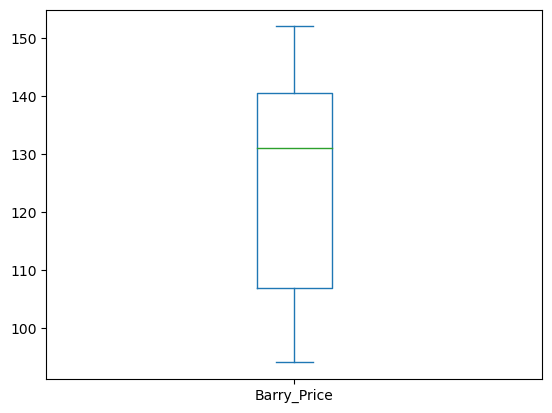

In [122]:
Price_quote['Barry_Price'].plot(kind='box')

<AxesSubplot:>

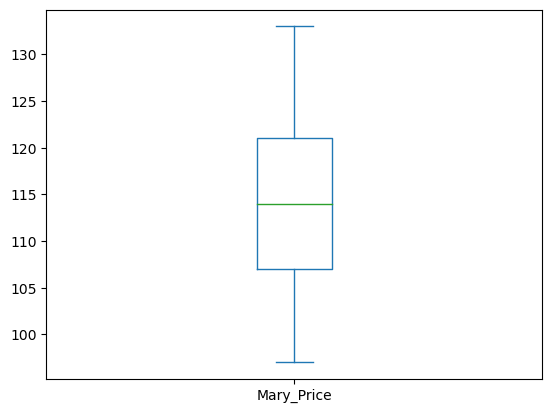

In [124]:
Price_quote['Mary_Price'].plot(kind='box')

In [91]:
Price_quote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [92]:
Price_quote.Barry_Price.mean()

124.33333333333333

In [93]:
Price_quote.Mary_Price.mean()

114.75

Ho= mean of Barry_Price= mean of Mary_Price
Ha= mean of Barry_Price not equals to mean of Mary_Price

At CI= 95 % , p value = 0.05
Test= T-Test

In [95]:
stats.ttest_rel(Price_quote.Mary_Price,Price_quote.Barry_Price)

Ttest_relResult(statistic=-2.5213765108923494, pvalue=0.02840588045242053)

P value 0.02840588045242053 < 0.05 , Ho Rejected
Business Conclusion

There is difference in average price quoted by mary and Barry

### Q3

In [109]:
Treatment = pd.read_csv("C:\\Users\\d\\OneDrive\\Desktop\\Python Study Material\\Case studies\\Casr study 5\\Treatment_Facility.csv")
Treatment

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [112]:
Treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   TRFF(%)            20 non-null     float64
 4   CI (%)             20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [113]:
Treatment.rename(columns=({'VAR4':'TRFF(%)','VAR5' : 'CI (%)'}),inplace=True)


In [115]:
Treatment.head(2)

,Month,Reengineer,Employee_Turnover,TRFF(%),CI (%)
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452


In [116]:
Treatment.describe()

,Month,Employee_Turnover,TRFF(%),CI (%)
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,14.169395,16.582433,43.199541
std,5.91608,8.836302,10.088265,41.715909
min,1.00000,0.000000,4.201681,0.000000
25%,5.75000,9.919350,9.596368,20.731427
50%,10.50000,12.470850,14.998702,25.669183
75%,15.25000,19.230750,19.807134,43.776901
max,20.00000,30.769200,41.176471,146.198830


In [117]:
import matplotlib.pyplot as plt 

<AxesSubplot:>

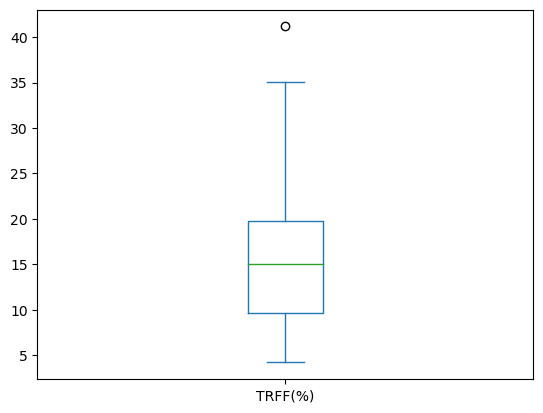

In [119]:
Treatment['TRFF(%)'].plot(kind='box')

<AxesSubplot:>

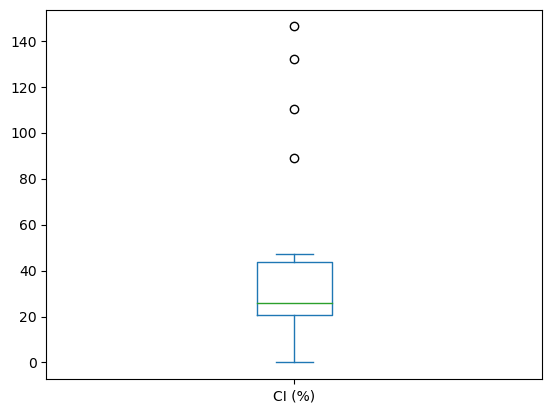

In [121]:
Treatment['CI (%)'].plot(kind='box')

In [129]:
p0 = Treatment['TRFF(%)'].min()
p25 = Treatment['TRFF(%)'].quantile(0.25)
p50 = Treatment['TRFF(%)'].median()  
p75 = Treatment['TRFF(%)'].quantile(0.75)
p100 = Treatment['TRFF(%)'].max()

iqr = p75 - p25

lc = p25 - 1.5 * iqr
uc = p75 + 1.5 * iqr

In [130]:
Treatment['TRFF(%)'].clip(upper=uc,inplace = True)

In [131]:
P0 = Treatment['CI (%)'].min()
P25 = Treatment['CI (%)'].quantile(0.25)
P50 = Treatment['CI (%)'].median()  
P75 = Treatment['CI (%)'].quantile(0.75)
P100 = Treatment['CI (%)'].max()

Iqr = p75 - p25

Lc = P25 - 1.5 * Iqr
Uc = P75 + 1.5 * Iqr

In [132]:
Treatment['CI (%)'].clip(upper=Uc,inplace = True)

In [133]:
Treatment.describe()

,Month,Employee_Turnover,TRFF(%),CI (%)
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,14.169395,16.279773,31.139672
std,5.91608,8.836302,9.377333,17.834444
min,1.00000,0.000000,4.201681,0.000000
25%,5.75000,9.919350,9.596368,20.731427
50%,10.50000,12.470850,14.998702,25.669183
75%,15.25000,19.230750,19.807134,43.776901
max,20.00000,30.769200,35.123283,59.093050


In [135]:
Treatment.head(1)

,Month,Reengineer,Employee_Turnover,TRFF(%),CI (%)
0,1,Prior,0.0,24.390244,42.682927


In [140]:
D1=Treatment.loc[Treatment.Reengineer=='Prior', 'CI (%)']
D2=Treatment.loc[Treatment.Reengineer=='Post', 'CI (%)']

In [141]:
D1.mean()

35.33426154643077

In [142]:
D2.mean()

23.34971927988571

Ho= CI rate has improved post Reengineer | mean(D2) <= mean(D2)
Ha= CI rate not improved post Reengineer | mean(D2) > mean(D2)

At CI = 95%, P value = 0.05
Test = T test 

In [147]:
stats.ttest_ind(D1,D2)

Ttest_indResult(statistic=1.477332997270037, pvalue=0.15686981242931372)

Business Conclusion 

since p value 0.15686981242931372 > 0.05 , we can say that CI rate has changed post Reengineer

### Q4

In [148]:
Priority_data= pd.read_csv("C:\\Users\\d\\OneDrive\\Desktop\\Python Study Material\\Case studies\\Casr study 5\\Priority_Assessment.csv")

In [150]:
Priority_data.head(2)

,Days,Priority
0,3.3,High
1,7.9,Medium


In [151]:
Priority_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [152]:
Priority_data.Priority.value_counts()

High      326
Medium    249
Low        67
Name: Priority, dtype: int64

In [157]:
S1= Priority_data.loc[Priority_data.Priority=='High','Days']
S2= Priority_data.loc[Priority_data.Priority=='Medium','Days']
S3= Priority_data.loc[Priority_data.Priority=='Low','Days']

In [154]:
S1.mean()

3.023619631901845

In [155]:
S2.mean()

2.5000000000000004

In [158]:
S3.mean()

4.228358208955225

H0= mean(S1)=mean(S2)=mean(S3) | Priority type and days are independent variables 
Ha= mean(S1)<mean(S2)   | mean(S2) < mean(S1) | Priority type and days are dependent variables 

At CI = 95%
p value = 0.05

Test = F test

In [159]:
stats.f_oneway(S1,S2,S3)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

Business Conclusion

p value 0.16411459461716182 > 0.05 
so we cannot say that Priority and days are dependent variables so With the given data we cannot say that the prioritization system is working.

### Q5

In [172]:
films_data= pd.read_csv("C:\\Users\\d\\OneDrive\\Desktop\\Python Study Material\\Case studies\\Casr study 5\\Films.csv")
films_data

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [162]:
films_data.rename(columns= {'_rowstate_' : 'rowstate'},inplace= True)

In [163]:
films_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rowstate        330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [165]:
films_data.isnull().sum()

rowstate           0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [190]:
films_data.dropna(inplace=True)

In [191]:
films_data.Gender = np.where(films_data.Gender=='Female',2,films_data.Gender)
films_data.Gender = np.where(films_data.Gender=='Male',1,films_data.Gender)
films_data.Gender = np.where(films_data.Gender=='1',1,films_data.Gender)
films_data.Gender = np.where(films_data.Gender=='2',2,films_data.Gender)

In [192]:
films_data

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,2,2,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,1,1,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,2,1,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [208]:
films_data.Marital_Status = np.where(films_data.Marital_Status=='Married',1,films_data.Marital_Status)
films_data.Marital_Status = np.where(films_data.Marital_Status=='Single',2,films_data.Marital_Status)
films_data.Marital_Status = np.where(films_data.Marital_Status=='1',1,films_data.Marital_Status)
films_data.Marital_Status = np.where(films_data.Marital_Status=='2',2,films_data.Marital_Status)
films_data.Marital_Status = np.where(films_data.Marital_Status=='Slngle',2,films_data.Marital_Status)

In [194]:
films_data

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,2,2,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,1,1,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,2,1,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [ ]:
### Q5(1)

In [195]:
films_data.groupby(by='Overall').Overall.count()

Overall
1.0    137
2.0    148
3.0     12
4.0      1
5.0      3
Name: Overall, dtype: int64

### overall customer satisfaction level is 1 and 2

### Q5(2)

In [199]:
### Customer satisfaction (Overall) may depends on Parking, Sinage and clean

### chi-squared test 
obs1= pd.crosstab(films_data.Overall,films_data.Sinage)
obs2=pd.crosstab(films_data.Parking,films_data.Overall)
obs3=pd.crosstab(films_data.Clean,films_data.Overall)

H0= No relation | independent variables
Ha= related to each other | dependent varibales

At CI = 95 % , p value = 0.05


In [200]:
stats.chi2_contingency(obs1)

(121.32462033201087,
 3.0544447763605627e-18,
 16,
 array([[4.77906977e+01, 6.37209302e+01, 2.04817276e+01, 2.73089701e+00,
         2.27574751e+00],
        [5.16279070e+01, 6.88372093e+01, 2.21262458e+01, 2.95016611e+00,
         2.45847176e+00],
        [4.18604651e+00, 5.58139535e+00, 1.79401993e+00, 2.39202658e-01,
         1.99335548e-01],
        [3.48837209e-01, 4.65116279e-01, 1.49501661e-01, 1.99335548e-02,
         1.66112957e-02],
        [1.04651163e+00, 1.39534884e+00, 4.48504983e-01, 5.98006645e-02,
         4.98338870e-02]]))

p value  3.0544447763605627e-18 < 0.05, H0 rejected
Overall and Sinage are dependent to each other

In [201]:
stats.chi2_contingency(obs2)

(218.79348282085004,
 1.2264032549812005e-37,
 16,
 array([[5.55282392e+01, 5.99867110e+01, 4.86378738e+00, 4.05315615e-01,
         1.21594684e+00],
        [6.32657807e+01, 6.83455150e+01, 5.54152824e+00, 4.61794020e-01,
         1.38538206e+00],
        [1.31993355e+01, 1.42591362e+01, 1.15614618e+00, 9.63455150e-02,
         2.89036545e-01],
        [3.18604651e+00, 3.44186047e+00, 2.79069767e-01, 2.32558140e-02,
         6.97674419e-02],
        [1.82059801e+00, 1.96677741e+00, 1.59468439e-01, 1.32890365e-02,
         3.98671096e-02]]))

p value 1.2264032549812005e-37 < 0.05, H0 rejected
Overall and Parking are dependent to each other | with increase in Parking, satisfaction increases 

In [202]:
stats.chi2_contingency(obs3)

(129.0342392337068,
 9.882317099745693e-20,
 16,
 array([[6.09900332e+01, 6.58870432e+01, 5.34219269e+00, 4.45182724e-01,
         1.33554817e+00],
        [6.28106312e+01, 6.78538206e+01, 5.50166113e+00, 4.58471761e-01,
         1.37541528e+00],
        [1.00132890e+01, 1.08172757e+01, 8.77076412e-01, 7.30897010e-02,
         2.19269103e-01],
        [2.27574751e+00, 2.45847176e+00, 1.99335548e-01, 1.66112957e-02,
         4.98338870e-02],
        [9.10299003e-01, 9.83388704e-01, 7.97342193e-02, 6.64451827e-03,
         1.99335548e-02]]))

p value 9.882317099745693e-20 < 0.05, H0 rejected
Overall and cleanliness are dependent to each other 

### Q5(3)

In [204]:
films_data.Gender.value_counts()   ### majority of audience is of gender 'Female'

2    195
1    106
Name: Gender, dtype: int64

In [209]:
films_data.Marital_Status.value_counts()    #### majority of audience belonging to Single 

2    210
1     91
Name: Marital_Status, dtype: int64

In [210]:
films_data.Age.value_counts()  ### majority of audience belongs to age category of 13-30 years

2.0    164
3.0    108
1.0     22
4.0      7
Name: Age, dtype: int64

In [211]:
films_data.Income.value_counts() ### majority ofd audience salary is Less than $50,000

1.0    135
3.0     86
2.0     80
Name: Income, dtype: int64

### Q5(4)

In [213]:
films_data.groupby('Hear_About').Hear_About.count().sort_values(ascending = False) 

### Majority of peoples heard of the film through word of mouth

Hear_About
5      212
4       39
1       19
3       13
2       11
2,5      2
1,5      1
3,4      1
3,5      1
4,5      1
5,4      1
Name: Hear_About, dtype: int64